In [1]:
!pip install gymnasium[toy-text]

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.0/14.0 MB 57.6 MB/s eta 0:00:00


In [2]:
import numpy as np
import gymnasium as gym
from time import sleep
import matplotlib.pyplot as plt
from IPython.display import clear_output

In [3]:
env = gym.make('Taxi-v3', render_mode="rgb_array")

In [4]:
observation, _ = env.reset()

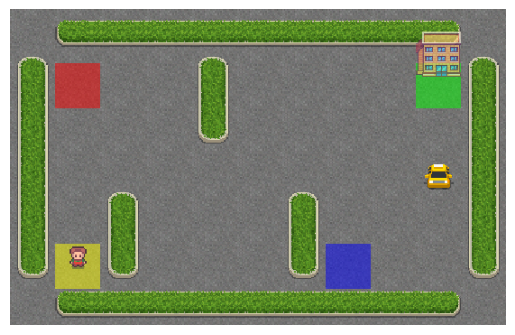

In [5]:
plt.imshow(env.render())
plt.axis('off');

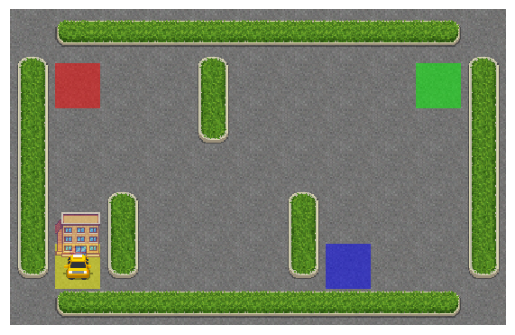

Epochs: 810
Penalties: 257
Reward: 20


In [6]:
state, _ = env.reset()
plt.imshow(env.render())
plt.axis('off')
plt.show();
sleep(4)
done = False
epochs = 0
penalties = 0
while not done:
    clear_output(wait=True)
    action = env.action_space.sample()
    state, reward, done, _, _ = env.step(action)
    plt.imshow(env.render())
    plt.axis('off')
    plt.show();
    if reward == -10:
        penalties += 1
    epochs += 1
    print('Epochs:', epochs)
    print('Penalties:', penalties)
    print('Reward:', reward)
    sleep(0.5)

In [7]:
q_table = np.zeros((env.observation_space.n, env.action_space.n))
q_table.shape

(500, 6)

In [8]:
alpha = 0.1
gamma = 0.6
epsillon = 0.1
for episode in range(15000):
    state = env.reset()[0]
    epochs, penalties, reward = 0, 0, 0
    done = False
    while not done:
        if np.random.uniform(0, 1) < epsillon:
            action = env.action_space.sample()
        else:
            action = np.argmax(q_table[state])
        old_value = q_table[state, action]
        new_state, reward, done, _, _ = env.step(action)
        next_max = np.max(q_table[new_state])
        q_table[state, action] = alpha * old_value + (1 - alpha) * (reward + gamma * next_max)
        state = new_state
        if reward == -10:
            penalties += 1
        epochs += 1
        if episode % 10 == 0:
            print('Episode:', episode)
            print('Epochs:', epochs)
            print('Penalties:', penalties)

Episode: 0
Epochs: 1
Penalties: 0
Episode: 0
Epochs: 2
Penalties: 0
Episode: 0
Epochs: 3
Penalties: 0
Episode: 0
Epochs: 4
Penalties: 0
Episode: 0
Epochs: 5
Penalties: 0
Episode: 0
Epochs: 6
Penalties: 0
Episode: 0
Epochs: 7
Penalties: 0
Episode: 0
Epochs: 8
Penalties: 0
Episode: 0
Epochs: 9
Penalties: 0
Episode: 0
Epochs: 10
Penalties: 0
Episode: 0
Epochs: 11
Penalties: 0
Episode: 0
Epochs: 12
Penalties: 0
Episode: 0
Epochs: 13
Penalties: 0
Episode: 0
Epochs: 14
Penalties: 0
Episode: 0
Epochs: 15
Penalties: 0
Episode: 0
Epochs: 16
Penalties: 0
Episode: 0
Epochs: 17
Penalties: 0
Episode: 0
Epochs: 18
Penalties: 0
Episode: 0
Epochs: 19
Penalties: 1
Episode: 0
Epochs: 20
Penalties: 2
Episode: 0
Epochs: 21
Penalties: 2
Episode: 0
Epochs: 22
Penalties: 2
Episode: 0
Epochs: 23
Penalties: 3
Episode: 0
Epochs: 24
Penalties: 4
Episode: 0
Epochs: 25
Penalties: 4
Episode: 0
Epochs: 26
Penalties: 4
Episode: 0
Epochs: 27
Penalties: 4
Episode: 0
Epochs: 28
Penalties: 4
Episode: 0
Epochs: 29
Penalti

In [9]:
q_table

array([[  0.        ,   0.        ,   0.        ,   0.        ,
          0.        ,   0.        ],
       [ -2.41837066,  -2.3639511 ,  -2.41837066,  -2.3639511 ,
         -2.27325184, -11.3639511 ],
       [ -1.870144  ,  -1.45024   ,  -1.870144  ,  -1.45024   ,
         -0.7504    , -10.45024   ],
       ...,
       [ -2.23156454,  -2.08768644,  -2.23156454,  -1.45024   ,
         -9.        ,  -9.        ],
       [ -2.42963126,  -2.1220864 ,  -2.4444767 ,  -2.12518449,
         -9.        , -11.39400131],
       [ -1.476     ,  -1.476     ,   5.52924   ,  11.        ,
         -3.456     , -10.386     ]])

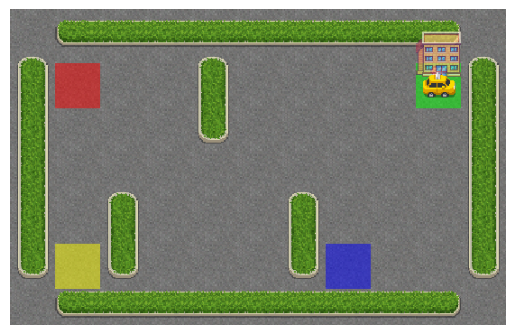

Epochs: 13
Penalties: 0
Reward: 20


In [10]:
state, _ = env.reset()
plt.imshow(env.render())
plt.axis('off')
plt.show();
sleep(4)
done = False
epochs = 0
penalties = 0
while not done:
    clear_output(wait=True)
    action = np.argmax(q_table[state])
    state, reward, done, _, _ = env.step(action)
    plt.imshow(env.render())
    plt.axis('off')
    plt.show();
    if reward == -10:
        penalties += 1
    epochs += 1
    print('Epochs:', epochs)
    print('Penalties:', penalties)
    print('Reward:', reward)
    sleep(0.5)